# ***THIS NOTEBOOK MAKES A NEURAL NATWORK REPRODUCE A TARGET, COMPUTE THE ENERGIES (TOTAL, POTENTIAL, KINETIC) AND THE NORM OF THE PREDICTIONS OF THE NETWORK AND THEN CREATES A HISTOGRAM OF THOSE VALUES***
---
---
---
---
---

# IMPORTS AND GLOBAL VARIABLES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from keras import layers, models, optimizers
import keras

from scipy import integrate
from scipy import interpolate

hbar = 1
omega = 1
m = 1
a = -5.
b = 5.

Using TensorFlow backend.


# DATA GENERATION

In [4]:
#################
#SECTION : FUNCTION DEFINITION
#################

#W.F. stands for "wave function"

def energy_compute (abscissa,psi):
  #interpolations
  tck_true = interpolate.splrep(abscissa, psi, k=3, s=0)                                         #W.F.
  tck_true_carre = interpolate.splrep(abscissa, psi*psi, k=3, s=0)                               #W.F. squared
  tck_true_x = interpolate.splrep(abscissa, abscissa*abscissa*psi*psi, k=3, s=0)                 #W.F. squared*x^2
  der_true = interpolate.splev(abscissa, tck_true, der=1)                                        #W.F. derivative
  tck_true_der = interpolate.splrep(abscissa,der_true*der_true, k=3,s=0)                         #W.F. derivative spline 1000

  int_true_carre = interpolate.splint(a,b,tck_true_carre)                                        #integral of W.F. squared
  int_true_x = interpolate.splint(a,b,tck_true_x)                                                #integral of W.F. squared*x^2 (<x^2>)
  int_true_der = interpolate.splint(a,b,tck_true_der)                                            #integral of derivative squared
  #total energy
  Energie = ((-pow(hbar,2)/(2*m))*(psi[-1]*der_true[-1]-psi[0]*der_true[0] 
                             - int_true_der) + 0.5*m*omega*int_true_x ) / int_true_carre
  #potential energy
  Energie_potentielle = 0.5*m*omega*int_true_x / int_true_carre
  #kinetic energy
  Energie_cinétique = (-pow(hbar,2)/(2*m))*(psi[-1]*der_true[-1]-psi[0]*der_true[0]
                             -int_true_der)/ int_true_carre
  #array with the 3 energies and the norm
  Energie_array = np.array([Energie,Energie_potentielle,Energie_cinétique,int_true_carre])
  return Energie_array





#################
#SECTION : OPENING FILES
#################
file1 = open("Energie_totale_nn.txt", "w")              #total energy
file2 = open("Energie_potentielle_nn.txt", "w")         #potential energy
file3 = open("Energie_cinetique_nn.txt", "w")           #kinetic energy
file4 = open("Probabilite_de_presence_nn.txt", "w")     #norm
file5 = open("Energies_fo.txt", "w")                    #values of the target






#################
#SECTION : COMPUTING THE ENERGY OF THE PREDICTIONS
#################

pts = 1000                        #Number of points on the X and Y axis
linx = np.linspace (a,b,pts)      #X axis

#ground state (what the network tries to reproduce)
x = a
h=10/pts
wave = np.zeros_like(linx, dtype=float)
for i in range(0,pts):
  wave[i] = pow(m*omega/(math.pi*hbar),0.25)*math.exp(-m*omega*(pow(x,2))/(2*hbar))
  x+=h





runs=50                                   #how many runs we want
energy_wave = energy_compute(linx,wave)   #array to write the energies and norm of the target
energy_preds = np.zeros((runs,4))         #array to write the energies and norm of the prediction after each run

for i in range(0,runs):
  print('run n°',i+1)

  #INITIALIZATION OF NEURAL NETWORK
  model = models.Sequential([
    layers.Dense(200, input_shape=(1,), activation='relu'),
    layers.Dense(200, input_shape=(1,), activation='relu'), 
    layers.Dense(1), # no activation -> linear function of the input
  ])
  opt = optimizers.Adam(learning_rate=0.001)
  model.compile(loss='mse',optimizer=opt)
  #NETWORK TRAINING
  model.fit(linx,wave, epochs=44, batch_size=50,verbose=0)
  predictions = model.predict(linx)
  preds = predictions.reshape(-1)

  #computing energies and norm
  energy_preds[i,:] = energy_compute(linx,preds)

  #writing prediction values in files
  print(energy_preds[i,0], file=file1)
  print(energy_preds[i,1], file=file2)
  print(energy_preds[i,2], file=file3)
  print(energy_preds[i,3], file=file4)

#clear of the network after all runs
keras.backend.clear_session()

#writing target values in files
print(energy_wave[0], file=file5)
print(energy_wave[1], file=file5)
print(energy_wave[2], file=file5)
print(energy_wave[3], file=file5)




file1.close()
file2.close()
file3.close()
file4.close()
file5.close()

run n° 1
run n° 2
run n° 3
run n° 4
run n° 5
run n° 6
run n° 7
run n° 8
run n° 9
run n° 10
run n° 11
run n° 12
run n° 13
run n° 14
run n° 15
run n° 16
run n° 17
run n° 18
run n° 19
run n° 20
run n° 21
run n° 22
run n° 23
run n° 24
run n° 25
run n° 26
run n° 27
run n° 28
run n° 29
run n° 30
run n° 31
run n° 32
run n° 33
run n° 34
run n° 35
run n° 36
run n° 37
run n° 38
run n° 39
run n° 40
run n° 41
run n° 42
run n° 43
run n° 44
run n° 45
run n° 46
run n° 47
run n° 48
run n° 49
run n° 50


# MULTIPLOT

Mean :  1.001547888323591
Standard dev :  0.002602302597996309
Max :  1.0137990062052276
Min :  0.9961292176658717
Mean :  0.5006780755087711
Standard dev :  0.0008223689200972434
Max :  0.50604099665327
Min :  0.500276453139315
Mean :  0.2510599830139018
Standard deviation :  0.001766804444777347
Max :  0.2599322218209936
Min :  0.24919295002961325
Mean :  0.2496180924948692
Standard dev :  0.0011456436269867607
Max :  0.25143484834300595
Min :  0.24525515768636863


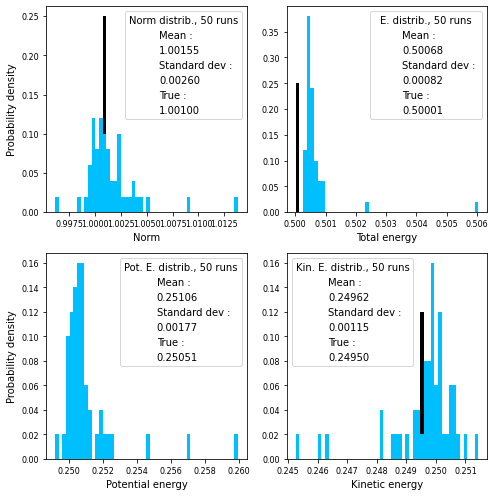

In [8]:
#multiplot
fig, axs = plt.subplots(2, 2,figsize=(7, 7))





#OPENING FILES
file1 = open("Energie_totale_nn.txt", "r")
file2 = open("Energie_potentielle_nn.txt", "r")
file3 = open("Energie_cinetique_nn.txt", "r")
file4 = open("Probabilite_de_presence_nn.txt", "r")


#NEURAL NETWORK FILES
with open('Energie_totale_nn.txt') as f:
    lines1 = f.readlines()
    E_nn = np.array([float(line.split()[0]) for line in lines1])

with open('Energie_potentielle_nn.txt') as f:
    lines2 = f.readlines()
    Ep_nn = np.array([float(line.split()[0]) for line in lines2])

with open('Energie_cinetique_nn.txt') as f:
    lines3 = f.readlines()
    Ec_nn = np.array([float(line.split()[0]) for line in lines3])

with open('Probabilite_de_presence_nn.txt') as f:
    lines4 = f.readlines()
    Presence_nn = np.array([float(line.split()[0]) for line in lines4])

#TRUE WAVE FUNCTION FILE
with open('Energies_fo.txt') as f:
    lines5 = f.readlines()
    Energies_fo = np.array([float(line.split()[0]) for line in lines5])

#number of bins
n=50


#Plot Presence_nn (NORM)
Moyenne = sum(Presence_nn)/len(Presence_nn)   #mean
Ecarttype = np.std(Presence_nn)               #standard deviation
Max = max(Presence_nn) 
Min = min(Presence_nn)

axs[0,0].hist(0,bins=n,alpha=0, range = (min(Presence_nn), max(Presence_nn)), label='Mean : ')
axs[0,0].hist(0,bins=n,alpha=0, range = (min(Presence_nn), max(Presence_nn)) ,label="{:1.5f}".format(Moyenne))
axs[0,0].hist(0,bins=n,alpha=0, range = (min(Presence_nn), max(Presence_nn)) ,label='Standard dev : ')
axs[0,0].hist(0,bins=n,alpha=0, range = (min(Presence_nn), max(Presence_nn)) ,label="{:1.5f}".format(Ecarttype))
axs[0,0].hist(0,bins=n,alpha=0, range = (min(Presence_nn), max(Presence_nn)) ,label='True : ')
axs[0,0].hist(0,bins=n,alpha=0, range = (min(Presence_nn), max(Presence_nn)) ,label="{:1.5f}".format(Energies_fo[3]))

axs[0,0].hist(Energies_fo[3], range = (min(Presence_nn), max(Presence_nn)),weights=0.25, bins = n, color = 'k')
axs[0,0].hist(Presence_nn, range = (min(Presence_nn), max(Presence_nn)),weights=np.ones(len(Presence_nn)) / len(Presence_nn), bins = n, color = 'deepskyblue')
axs[0,0].set_xlabel('Norm')
axs[0,0].set_ylabel('Probability density')
axs[0,0].legend(title = 'Norm distrib., 50 runs')
axs[0,0].tick_params(axis = 'y',labelsize='8')
axs[0,0].tick_params(axis = 'x',labelsize='8')

#Print Presence_nn
print('Mean : ',Moyenne)
print('Standard dev : ',Ecarttype)
print('Max : ',Max)
print('Min : ',Min)






#Plot E_nn (TOTAL ENERGY)
Moyenne = sum(E_nn)/len(E_nn)
Ecarttype = np.std(E_nn)
Max = max(E_nn)
Min = min(E_nn)

axs[0,1].hist(0,bins=n,alpha=0, range = (Energies_fo[0], max(E_nn)), label='Mean : ')
axs[0,1].hist(0,bins=n,alpha=0, range = (Energies_fo[0], max(E_nn)) ,label="{:1.5f}".format(Moyenne))
axs[0,1].hist(0,bins=n,alpha=0, range = (Energies_fo[0], max(E_nn)) ,label='Standard dev : ')
axs[0,1].hist(0,bins=n,alpha=0, range = (Energies_fo[0], max(E_nn)) ,label="{:1.5f}".format(Ecarttype))
axs[0,1].hist(0,bins=n,alpha=0, range = (Energies_fo[0], max(E_nn)) ,label='True : ')
axs[0,1].hist(0,bins=n,alpha=0, range = (Energies_fo[0], max(E_nn)) ,label="{:1.5f}".format(Energies_fo[0]))

axs[0,1].hist(Energies_fo[0], range = (Energies_fo[0], max(E_nn)) ,weights=0.25, bins = n, color = 'k')
axs[0,1].hist(E_nn, range = (Energies_fo[0], max(E_nn)) ,weights=np.ones(len(E_nn)) / len(E_nn), bins = n, color = 'deepskyblue')
axs[0,1].set_xlabel('Total energy')
axs[0,1].legend(title = "E. distrib., 50 runs")
axs[0,1].tick_params(axis = 'y',labelsize='8')
axs[0,1].tick_params(axis = 'x',labelsize='8')
#Print E_nn
print('Mean : ',Moyenne)
print('Standard dev : ',Ecarttype)
print('Max : ',Max)
print('Min : ',Min)






#Plot Ep_nn (POTENTIAL ENERGY)
Moyenne = sum(Ep_nn)/len(Ep_nn)
Ecarttype = np.std(Ep_nn)
Max = max(Ep_nn)
Min = min(Ep_nn)

axs[1,0].hist(0,bins=n,alpha=0, range = (min(Ep_nn), max(Ep_nn)), label='Mean : ')
axs[1,0].hist(0,bins=n,alpha=0, range = (min(Ep_nn), max(Ep_nn)) ,label="{:1.5f}".format(Moyenne))
axs[1,0].hist(0,bins=n,alpha=0, range = (min(Ep_nn), max(Ep_nn)) ,label='Standard dev : ')
axs[1,0].hist(0,bins=n,alpha=0, range = (min(Ep_nn), max(Ep_nn)) ,label="{:1.5f}".format(Ecarttype))
axs[1,0].hist(0,bins=n,alpha=0, range = (min(Ep_nn), max(Ep_nn)) ,label='True : ')
axs[1,0].hist(0,bins=n,alpha=0, range = (min(Ep_nn), max(Ep_nn)) ,label="{:1.5f}".format(Energies_fo[1]))


axs[1,0].hist(Energies_fo[1], range = (min(Ep_nn), max(Ep_nn)),weights=0.12, bins = n, color = 'k')
axs[1,0].hist(Ep_nn, range = (min(Ep_nn), max(Ep_nn)),weights=np.ones(len(Ep_nn)) / len(Ep_nn), bins = n, color = 'deepskyblue')
axs[1,0].set_xlabel('Potential energy')
axs[1,0].set_ylabel('Probability density')
axs[1,0].legend(title = 'Pot. E. distrib., 50 runs')
axs[1,0].tick_params(axis = 'y',labelsize='8')
axs[1,0].tick_params(axis = 'x',labelsize='8')
#Print Ep_nn
print('Mean : ',Moyenne)
print('Standard deviation : ',Ecarttype)
print('Max : ',Max)
print('Min : ',Min)





#Plot Ec_nn (KINETIC ENERGY)
Moyenne = sum(Ec_nn)/len(Ec_nn)
Ecarttype = np.std(Ec_nn)
Max = max(Ec_nn)
Min = min(Ec_nn)

axs[1,1].hist(0,bins=n,alpha=0, range = (min(Ec_nn), max(Ec_nn)), label='Mean : ')
axs[1,1].hist(0,bins=n,alpha=0, range = (min(Ec_nn), max(Ec_nn)) ,label="{:1.5f}".format(Moyenne))
axs[1,1].hist(0,bins=n,alpha=0, range = (min(Ec_nn), max(Ec_nn)) ,label='Standard dev : ')
axs[1,1].hist(0,bins=n,alpha=0, range = (min(Ec_nn), max(Ec_nn)) ,label="{:1.5f}".format(Ecarttype))
axs[1,1].hist(0,bins=n,alpha=0, range = (min(Ec_nn), max(Ec_nn)) ,label='True : ')
axs[1,1].hist(0,bins=n,alpha=0, range = (min(Ec_nn), max(Ec_nn)) ,label="{:1.5f}".format(Energies_fo[2]))

axs[1,1].hist(Energies_fo[2], range = (min(Ec_nn), max(Ec_nn)),weights=0.12, bins = n, color = 'k')
axs[1,1].hist(Ec_nn, range = (min(Ec_nn), max(Ec_nn)),weights=np.ones(len(Ec_nn)) / len(Ec_nn), bins = n, color = 'deepskyblue')
axs[1,1].set_xlabel('Kinetic energy')
axs[1,1].legend(title = 'Kin. E. distrib., 50 runs')
axs[1,1].tick_params(axis = 'y',labelsize='8')
axs[1,1].tick_params(axis = 'x',labelsize='8')
#Print Ec_nn
print('Mean : ',Moyenne)
print('Standard dev : ',Ecarttype)
print('Max : ',Max)
print('Min : ',Min)


plt.tight_layout()
plt.savefig('energies_multiplot.pdf')
plt.show()